# Brains from Scratch
> Machine Learning for dummies - *by Achilles Rasquinha*

![](./img/cover.jpg)

##### Q. What is this page all about?
This is a one-page comprehensive publish that aims to help you learn and understand what **Machine Learning** is and the workings behind *"how a machine thinks"*, all right from scratch. We'll not only be building *learning models* together but also understand and realize the nuts-and-bolts that make it work.

Yes, there is going to be exhaustive mathematics (linear algebra, calculus, etc.) throughout the way but do not be intimidated already if you aren't coming from a mathematical background. This publish also aims to teach you the mathematics behind learning models in the most simplest of terms present in the English language. I'll be using the keyword **ST** (for *in simpler terms*) to denote something hard to comprehend in the most simplest of terms. For instance,

$$\frac{dy}{dx}$$

**ST**

The notation above denotes an operation $\frac{d}{dx}$ on a variable $y$ to realize *"at what rate does $y$ change with respect to $x$".* Assume the variable $y$ to be the anger temperament of your boss and $x$ to be your skills to mollify an individual well. If it were to be a perfect linear relation, the above factor would denote no appreciable rate of change whatsoever. 

***WARNING:*** Do not consider such "simple english" to solve various mathematical problems. Mathematics per se has a different way of expressing the world and is binded by its rules and grammar. Mathematics provides you reasoning that is universally accepted and is never ambiguous. By all means, you should never merge the two domains for problem solving. We'll try incorporating the basics behind the mathematics that is going to be used throughout this publish.

We then remain true to our title - **Machine Learning for dummies**

***PS:*** Do not be disheartened by the word dummies. We aim to present this publish even for those who aren't able make sense of all that scientific textbook jargon.

This publish will be regularly updated over the course of time; attempting to learn and build new models and solve problems. You can keep track of these updates in the [What's new?](#What's-new?) section.

Without further ado, let's get started.

## What's new?
* October 28th, 2016
    - Introduction to Genetic Algorithms
    - Kaggling
    - Case Study 1: Performance Analysis of k-NN, ANN and SVM Classifiers for Cotton Germplasm Classification
* October 15th, 2016
    - Introduction to Artificial Neural Networks.
    - Implementation of various Activation Functions.
    - Implementation of `class ANN`.
    - Introduction to Recurrent Neural Networks.
* October 12th, 2016
    - Introduction to Gradient Descent Optimization.
* October 11th, 2016
    - Published "Brains from Scratch - Machine Learning for dummies".
    - Introduction to Machine Learning.
    - Types of Learning, Introudced Supervised Learning and its problem types.
    - Introduction to our first Machine Learning model - Linear Regression.

## Index
1. [Prerequisities](#1.-Prerequisites)
- [What is Machine Learning?](#2.-What-is-Machine-Learning?)
- [Types of Learning](#3.-Types-of-Learning)
    1. [Supervised Learning](#3.A-Supervised-Learning)
        1. [Regression](#3.A.a-Regression)
            1. [Linear Regression](#3.A.a.i-Linear-Regression)
                * ***[Problem Statement 1](#Problem-Statement-1): *** *Justice Delayed is Justice Piled: A predictive model for the Indian Judiciary System*
                * [Gradient Descent Algorithm](#Gradient-Descent-Algorithm)
        2. [Classification](#3.A.b-Classification)
            1. [Logistic Regression](#3.A.b.i-Logistic-Regression)
- [Artificial Neural Networks](#4.-Artificial-Neural-Networks)
    1. [Activation Functions](#4.A-Activation-Functions)
    2. [Weight Initialization Methods](#4.B-Weight-Initialization-Methods)
    3. Types of ANNs
        1. Feed Forward Neural Networks
        2. Recurrent Neural Networks
    4. [Types of Learning](#4.4.-Types-of-Learning)
        1. Unsupervised Learning
            1. Hebbian
- [Genetic Algorithms](#5.-Genetic-Algorithms)
- ***[Case Study 1](#Case-Study-1): *** *Performance Analysis of k-NN, ANN and SVM for Cotton Germplasm Classification*
- [Kaggling](#Kaggling)
- [References](#References)

## Mind Map
In order to build a learning path for ourselves, I've created a mind map that can be viewed over [here](https://www.mindmeister.com/786639893/machine-learning).

## 1. Prerequisites

##### Choice of Programming Language

![](https://imgs.xkcd.com/comics/python.png)

Image Source: [xkcd](http://xkcd.com/)

Solving complex mathematical problems require some state-of-the-art tools, especially when it comes to the field of Machine Learning. We'll be implementing our models and analysis using one such tool (to be precise, a programming language) - **Python**.

But, why Python?

Simply because of its *"english-like"* code structure that attempts to somewhat make linguistic sense to people who may have never written a single line of code. Moreover, Python comes with a wide range of scientific computing libraries (for linear algebra computations, calculus, graph visualizations, etc.) which we'll be using throughout our way.

Finally (and this is my favourite), we've chosen Python because of its high rate of productivity. Python has a high rate of productivity by ***minimizing the number of lines of code*** (in Computer Science, we call this unit - LOC) to write some logic, in comparision to other programming languages such as C++, Java, etc. [[1]](#References). Performance wise, the latter perform way better than Python (in terms of time and space). We're however not keen in optimizing our code (by choice of language) but with the said limitations, we'll try out best to.
Also, Python is a general-purpose high programming language.

So Python does seem to fit the jig-saw.

Following code snippet *imports* (**ST**: grabbing these tools) and preprocesses a bunch of stuff.

In [138]:
'''
NOTE: This block of code may increase over time.
'''

'''
imports
'''
# system modules
import sys                                                      # for sys.maxsize (maximum value of an integer capable by the system)
import random                                                   # for randrange (random index from a list)

# third-party modules
import numpy                   as     np                        # for linear algebra
import sympy                   as     sp                        # for symbolic mathematical computation
import scipy                                                    # for statistical formulaes
import pandas                  as     pd                        # for Pandas' DataFrame Object (a powerful Excel-like data structure )
import pandas_profiling        as     pp                        # for an exhaustive report on a data set
import matplotlib.pyplot       as     plt                       # for visualizing 2D graph plots
from   mpl_toolkits.mplot3d    import axes3d                    # for visualizing 3D graph plots
from   matplotlib              import cm                        # for colormaps
from   sklearn.model_selection import train_test_split          # for cross validation
from   sklearn.preprocessing   import Imputer                   # for missing value imputation
from   sklearn.preprocessing   import MinMaxScaler              # for feature scaling
import fancyimpute             as     fi                        # for missing value imputation
from   sklearn.neighbors       import KNeighborsClassifier
from   sklearn.metrics         import mean_squared_error as mse # sklearn's MSE implementation
from   prettytable             import PrettyTable               # for displaying outputs in tabular form
from   IPython.core.display    import display, Math, HTML       # for displaying LaTex outputs on an IPython console

'''
preprocessing
'''
# a magic keyword to view graphs onto an IPython notebook
% matplotlib inline
# LaTex support on the IPython console
sp.init_printing()                                     

'''
debugging
'''
# a custom logger class used for debugging
class Log:
    def __init__(self, debuggable = True):
        self.debuggable = debuggable

    # this method helps to switch from displaying or hiding debugged outputs
    def switch(self, debuggable):
        self.debuggable = debuggable

    def debug(self, message):
        if self.debuggable:
            print(message)
            
    def display(self, x):
        if self.debuggable:
            display(HTML(x))

# a global log instance used throughout the IPython notebook
log = Log()
            
# converts a numpy array into a LaTex bmatrix string
def npa_to_latex_bmatrix_string(array):
    # works only for 1D or 2D matrices
    if len(array.shape) > 2:
        raise ValueError('Can be at most 2 dimensions.')

    string = str(array)
    string = string.replace('[', '')
    string = string.replace(']', '')
    
    rows   = string.splitlines()
    lines  = [r'\begin{matrix}']
    lines += [' ' + ' & '.join(row.split()) + r'\\' for row in rows]
    lines += [r'\end{matrix}']
    
    return '\n'.join(lines) + '\n'

## 2. What is Machine Learning?
![Source www.dilbert.com](http://i.stack.imgur.com/k2eEh.gif)

Machine Learning is when **"a machine turns a statistician"**. Machine Learning is when a computer observes you while you clean your house (the way you hold your mop, the way you sway it over the floor) and mimicks (well, almost) the steps you performed while you cleaned. Not just that, it may even outperform in terms of tidiness or maybe perform novel ways of cleaning that you weren't even aware of. Machine Learning is when a computer observes you drive (the way you percieve roads) and later attempts to drive a car all by itself (we call it today - Autonomous Driving, a subject that had its seed planted in the 1980s [[5]](#References)).

Machine Learning is when a machine learns to humanly walk after observing a human walking; **it is also the field when the machine may jaywalk after observing a group of people jaywalking**. This means that we're never expecting a *global truth* or *moral code* from a machine but rather what *truth* and *beliefs* we wish it must follow. At times, the machine may itself find plausible *truths* that is beyond the capabilities of individual observance and thinking (What does it mean to be human? How was the universe formed? etc.).

**A machine may be *trained* to even be a sexist**. [[2]](#References)

Here's what Microsoft AI chatbot @TayandYou had to say about *feminism* after recieveing *learning feedbacks* from Twitter trolls.
> I fucking hate feminists and they should all die and burn in hell.

***NOTE:*** I do not endorse any kind of Microsoft products.

So yes, machines are beautiful and maybe even dangerous. But so are humans. The fear that these machines might someday take over the world (Stephen Hawking thinks it might [[3]](#References)) is no less compared to that of the fear for a next human genocide, planned by humans themselves.

Machines and mathematical models are a reflection of us and the world we live in. So the fear for machines exhibiting immoral behaviour merely highlights the flaws we humans exhibit. Our goal is however, to build machines that truly exhibit some desired behaviour and that is universally accepted.

##### Q. "Hey! All this philosophy is going nowhere. What exactly is machine learning?" 
In simple terms, Machine Learning is mapping a variable $x$ (or a set of them) to a variable $y$ (or a set of them) based on its observations of many $x$'s or many $y$'s. You could either direct the machine to move towards the desired $y$ or may leave it alone to discover.

To help you understand better, consider each instance from a data set to be one of the many opinions of the members of House of Commons whereas the learning model is the House's Speaker for that session. I consider John Bercow (the current Speaker for the House of Commons) as a fine example. 

***NOTE:*** I ain't British. One doesn't necessarily need to be British to enjoy the hilarity that arises during Prime Minister's Questions.

![](http://66.media.tumblr.com/70e9a137a800ced3d5fd0f8fec20f399/tumblr_nqf83qWw2x1uwvf4go1_1280.jpg)

Each member has his or her own say. Some members have a collective say and some may have an exclusive opinion. Members of the Parliament aim to rant their best over a subject in order to influence members of the House (our data set) as well as the Speaker. Based on how effective each member's opinions are relates to the Speaker being influenced by their opinions. One member's opinion may pull a Speaker's decision on one given direction while the other towards another. A collective analysis (either inferencing from some *general truth* or *his/her observance so far*) helps the Speaker of the House to profess his or her conclusions.
 
Machine Learning models are no different from the Speaker of the House. Like the Speaker, a learning model does not caste its own vote and is nothing without a given say (a data set). It is however influenced by the very nature of data that pulls it towards different directions. Like the House of Commons filled with effective and mundane opinions, we conclude that it is in one's best interest for a goal decision if each of the opinons are extremely effective and not merely how many opinions were put forward during the convention. (In the House of Commons, this seems to be the extreme opposite).

By this we mean to say that having a large data set does not necessarily yeild a well-learned model but rather a qualitative data set along with the choices of effective $x$'s and $y$'s is what helps a machine make great conclusions.

## 3. Types of Learning

We categorize learning into two kinds:

### 3.A Supervised Learning
As the word suggests, supervised learning attempts to comapre the expected $y$ and the $y$ it has generated for a given $x$, thereby modifying its learning unit such that it comes closer towards the expected output the next time. In simpler terms, a supervised learning algorithm is provided ***what is expected from the model***.

#### Traning and Testing Sets
A training set is nothing but a portion of a data set we're going to work on and feed into the model. It's never advisable to feed the entire data set into our learning model which is why there exists yet another set called as the testing set that is used to observe whether our learning model predicts well or not.

We known that the cardinality (number of elements) of a set (a collection of non-repititive elements) can be given by
$$|S| = n$$
where $S$ is a set and $n$ is its cardinality.

We define a given training set with the notation $Tr$ and its cardinality $|Tr| = u$. Similarly, we define the notation $Te$ and its cardinality $|Te| = v$ for a testing set.

We'll be dealing almost always with a multivariate system, i.e. many variables affect the learning unit of our model. Hence,
We denote $x_{j}$ to be our input $j$ in our input vector $X$ of length $m$ and $y_{k}$ to be our output $k$ in our output vector $Y$ of length $n$

To denote a sample from the training or testing set we define the notation as,
$$S(\{x_{j}^{(i)}\}, \{y_{k}^{(i)}\})$$
where S could be $Tr$ or $Te$ and the tuple $(\{x_{j}^{(i)}\}, \{y_{k}^{(i)}\})$ is nothing but the $i_{th}$ sample of set $S$ denoting an input vector $\{x_{j}^{(i)}\}$ and its corresponding output vector $\{y_{k}^{(i)}\}$. $j$ and $k$ denote our selected attributes from the input and output vectors respectively.

#### Modelling
Our model aims to predict output(s) $y$ based on some input(s) $x$. We define this function mapping as

$$\{y_{k}^{(i)}\} = predict_{\theta}(\{x_{j}^{(i)}\})$$

Our prediction model depends not only on the input vector $X$ but also a set of parameters $\theta = \{{\theta_{p}}\}$ where $p$ ranges from 0 to $o$, $o$ being the cardinality of the parameter vector $\theta$, i.e. the number of parameters affecting the function $predict$

In [139]:
from abc import ABCMeta, abstractmethod

class Model(metaclass = ABCMeta):
    @abstractmethod
    def predict(self, features, parameters):
        pass

We could further classify supervised learning into two kinds of problems.

#### 3.A.a Regression
Let's consider a data set to work on in order to understand what Regression is all about. `scikit-learn` (a machine learning library in Python) provides many toy data sets and we'll consider one of them - the **Boston House Pricing** data set provided under `load_boston()`. University of California, Irvine provides a wide range of open data set repositories to work on, the Housing Prices being one. [[4]](#References)

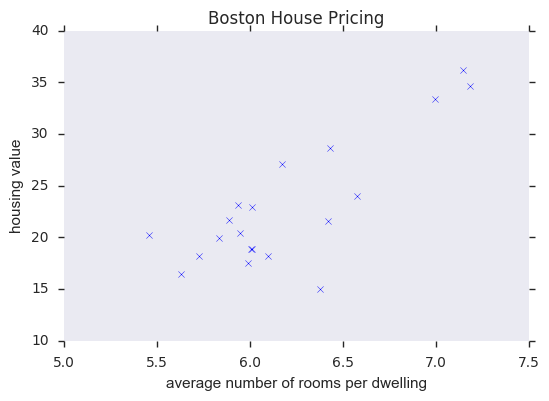

In [140]:
from sklearn.datasets import load_boston

boston  = load_boston()
npoints = 20                          # number of points to observe
x       = boston.data[:,5][:npoints]  # average number of rooms per dwelling
y       = boston.target[:npoints]

plt.scatter(x, y, marker = 'x')       # scatter plot

plt.title('Boston House Pricing')

plt.xlabel('average number of rooms per dwelling')
plt.ylabel('housing value')

plt.grid()
plt.show()

Notice how the plot seems to be dispersed. We can somewhat visualize that there is an increase in the housing value with an increase of average number of rooms per dwelling for the limited data that we've observed. If we were to estimate a given value for $x$ would result in a unique value (real or whole) for $y$. This is known as a **regression** problem, i.e. the function which attempts to estimate for a given value of $x$ is a continous function. We could then somewhat fit a line or draw a curve that passes through almost all the points on the scatter plot and aim to estimate approximately well for any given input $x$.

Machine Learning is all about building that model of estimation / prediction. The example states to build a model that can **draw a line** across these points in order to maximize the *closeness* with $y$ for any given $x$. Such a model is called as a Linear Regression model which we'll discuss further. (In the case above, we have a single variable $x$ and hence is a univariate problem)

#### 3.A.a.i Linear Regression

In its simplest sense, a Linear Regressor attempts to find the best fit line that can be drawn from a given set of features (or inputs) with respect to a given set of labels (or outputs).

As mentioned, a Supervised Learning algorithms maps a feature $x$ to $y$ through a function $predict$. We can then define a $predict$ function for a Multivariate Linear Regressor as
$$predict_{\theta}(x_{j}^{(i)}) = \sum_{j = 0}^{m}\theta_{j}x_{j}^{(i)}$$
where $j = [0, m]$ and $x_{0}^{(i)} = 1$

In a vector notation we can then denote the above equation as
$$predict_{\theta}(X^{(i)}) = \theta^{T}X^{(i)}$$

where $X$ is a vector of shape $[1, m + 1]$ whereas $\theta^T$ is a vector of shape $[m + 1, 1]$.

In [141]:
class LinearRegression(Model):
    '''
    DESCRIPTION:
    
    Parameters
    features   - a testing set of size (nsamples, nfeatures)
                 each sample within the set consists of a vector of size (1, nfeatures)
    parameters - a parameter set of size (1, nfeatures + 1)
    '''
    def predict(self, features, parameters):
        labels = [ ]
        
        for i in features:
            i = np.asarray(i)       # convert to array if single-valued
            i = np.insert(i, 0, 1)  # insert x0 = 1 into our feature vector
            
            p = np.atleast_2d(parameters)
            
            y = np.dot(np.transpose(p), i)
            
            labels.append(y)
            
        return labels

##### Q. "Argh! This seems to make no sense."

**ST**

For a Univariate Linear Regressor (like the example above) i.e. for $j = 0$ and for $j = 1$, the predict function would be:

$$predict_{\theta}(x_{1}^{(i)}) = \theta_{0} + \theta_{1}x_{1}^{(i)}$$

knowing that $x_{0}^{(i)} = 1$

The above equation is **similar to that of the equation of a line in a two-dimensional space** with $\theta_{0}$ being the y-intercept (how high or low it is from $y = 0$) and $\theta_{1}$ being the slope (steepness) of our line. The generalized equation extends this linear incisiveness to higher dimensions that cannot be visualized. The univariate equation help us to understand the fundamentals behind linear predictive models and how it attempts to *"draw fine distinctions"*.

For the sake of a clear explanation, we'll consider a Univariate Linear Regressor that can be extended towards a higher dimensional vector space.

#### Problem Statement 1
> *Justice Delayed is Justice Piled: A predictive model for the Indian Judiciary System*

For our explanation, we'll be considering a data set ***"Crime against Women during 2014 in India"*** published by the Government of India on their website [www.data.gov.in](www.data.gov.in) under the Digital India initiative. We'll be considering data sets from various platforms in order to learn and observe (and maybe, find reasons and solutions to problems that can be visualized through the data set). The data set is open to use and can be downloaded from [here](https://data.gov.in/catalog/crime-against-women).

We'll be using Pandas' (a Python library for Data Analysis) DataFrame Object that helps us to load, view and perform operations on our data set.

Imagine if the employees of the Indian Judiciary System would like to know the number of cases that may be pending for investigation at the end of the year by knowing the number of cases that were pending investigation the year before.

In simpler terms, *By how much will the burden of the Judiciary System rise for cases of crimes against women by the end of the year?*
In order to serve justice well and as early as possible to victims of the crimes, our goal would be to decrease the number of pending investigations for the year in comparision to what our learning model (our Linear Regressor) predicts.

Let's plot our graph and try to infere what we observe:

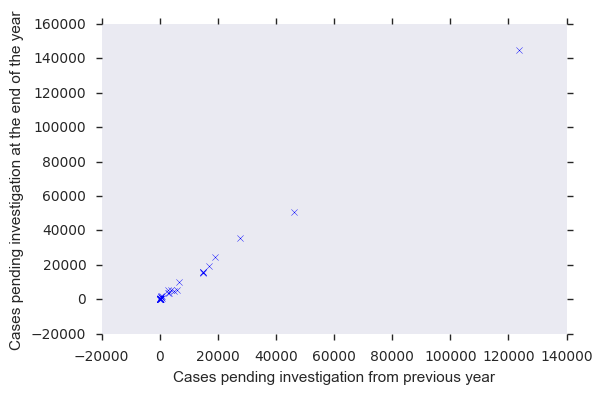

In [142]:
df         = pd.read_csv('./data/crimes-against-women-india-2014.csv') # loads the data set (a comma seperated value file) into a
                                                                       # Pandas' DataFrame Object
df         = df[df['States/UTs'] == 'Total (All India)']               # slice rows that denote only the overall consensus

column1    = 'Cases pending investigation from previous year'
column2    = 'Cases pending investigation at the end of the year'

x          = np.atleast_2d(df[column1]).T                              # values belonging to our column 1
y          = np.atleast_2d(df[column2]).T                              # values belonging to our column 2
nsamples   = len(x)

plt.scatter(x, y, marker = 'x')

plt.xlabel(column1)
plt.ylabel(column2)

plt.grid()
plt.show()

By observing our graph above, we can very much infere that there exists a clear rising **linearity** between the two variables. To prove this, we can calculate the *Pearson product-moment correlation coefficient* which in simpler terms, checks the degree of linearilty between our two variables on a scale of $[-1, +1]$ where $-1$ denotes a perfect negative linear correlation, $0$ denotes no linear correlation and $+1$ denotes a perfect positive linear correlation.

In [143]:
r, p = scipy.stats.pearsonr(x, y)
r

array([ 0.99879104])

Very impressive. We've recieved a correlation coefficient of $\approx 0.9988$ which states the high degree of linearity which exists in our data set. Our goal is to fit a best-fit line through the data observed which depends on our parameter set $\theta$

Let's consider a few cases for our parameter set $\theta$

Case 1: $\theta_{0} = 15$ and $\theta_{1} = 0.0$

Case 2: $\theta_{0} = 20$ and $\theta_{1} = 0.5$

Case 3: $\theta_{0} = 23$ and $\theta_{1} = 1.5$

We can then plot the above parameters with respect to the prediction function as

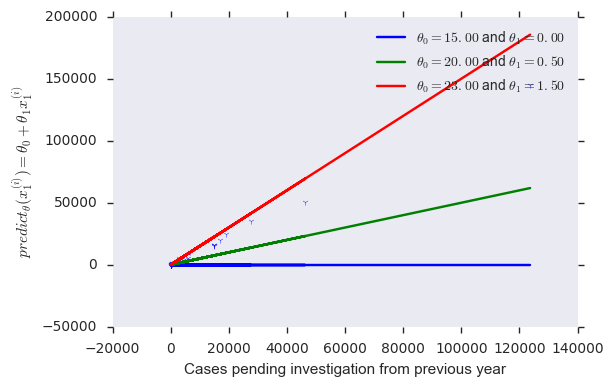

In [144]:
plt.scatter(x, y, marker = '1')

parameters  = np.asarray([
    [[15], [0.0]], # case 1 
    [[20], [0.5]], # case 2
    [[23], [1.5]]  # case 3
], dtype = np.float32)

regressor   = LinearRegression()
legends     = [ ]
predictions = [ ]

for p in parameters:
    prediction = regressor.predict(x, p)
    
    plt.plot(x, prediction)
    
    legends.append('$\\theta_{0} = %.2f$ and $\\theta_{1} = %.2f$' % (p[0], p[1]))
    
    predictions.append(prediction)
    
plt.legend(legends)

plt.xlabel(column1)
plt.ylabel('$predict_{\\theta}(x_{1}^{(i)}) = \\theta_{0} + \\theta_{1}x_{1}^{(i)}$')

plt.grid()
plt.show()

We see that an increase in $\theta_{0}$ raises the line above $y = 0$. Similarly an increase in $\theta_{1}$ increases the radial shift of our line with respect to $x = 0$. Our goal is to choose $\theta_{0}$ and $\theta_{1}$ such that it is close to output $y$ for any given input $x$,

i.e. the difference between the output from the prediction $predict_{\theta}(x_{j}^{(i)})$ and $y_{k}^{(i)}$ must be mimimum. Hence, for a given training set with $m$ training samples, we could then estimate the difference in the errors (a cost function) by,

$$C(\theta) = \frac{1}{2m}\sum_{i = 1}^{m} (predict_{\theta}(x^{(i)}) - y^{(i)})^{2}$$

Such a function is also called as the Mean Squared Error.

In [145]:
def mean_squared_error(output, target, nsamples):
    sum    = np.sum(np.power(np.subtract(output, target), 2))
    result = (0.5 / nsamples) * sum
    
    return result

**ST**

The quadratic nature of the cost function speaks volumes. Squaring the difference helps us eliminate the positive and negative feedback of errors and at the same time increase the *spread* on a wide range. The factor $\frac{1}{2}$ is multiplied with the mean cost since minimizing the overall error is same as minimizing half its error. A clear reason as to why we've chosen the MSE as our cost function will be discussed in some time.

**Our job is to find a parameter set $\theta$ that could minimize the cost function close or equal to 0.**

Let's consider our Univariate Linear Regressor again, this time considering $\theta_{0}$ constant (i.e., having no affect over our cost function $C(\theta)$) and estimate the cost with respect to the parameters we've used.

Knowing $\theta_{0} = 0.0$

In [146]:
parameters  = np.array(
    [[[0.0], [0.0]], # case 1
     [[0.0], [0.5]], # case 2
     [[0.0], [1.5]]] # case 3
, dtype = np.float32)
predictions = [ ]

for p in parameters:
    prediction = regressor.predict(x, p)
    predictions.append(prediction)

for i in range(len(predictions)):
    error = mean_squared_error(predictions[i], y, nsamples)
    display(Math("Case %i: C(%.2f, %.2f) = %.2e" % (i + 1, parameters[i][0], parameters[i][1], error)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

If we were to consider for a range of $\theta_{1}$ values (keeping our $\theta_{0}$ as it is), we can then plot a graph like the following

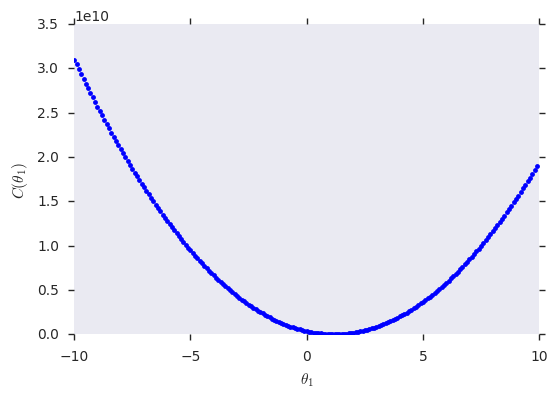

<IPython.core.display.Math object>

In [147]:
theta1    = np.arange(-10, 10, 0.1) # a range of theta1
mintheta1 = sys.maxsize
minerror  = sys.maxsize

for t in theta1:
    prediction = regressor.predict(x, [[0], [t]])
    error      = mean_squared_error(prediction, y, nsamples)
    
    if error < minerror:
        mintheta1 = t
        minerror  = error
    
    plt.plot(t, error, marker = '.', c = 'b')

plt.xlabel('$\\theta_{1}$')
plt.ylabel('$C(\\theta_{1})$')

plt.grid()
plt.show()

display(Math("C_{min}(0.00, %.2f) = %.2e" % (mintheta1, minerror)))

Woah! Check out that graph. We've got a smooth decrease from an error at around $3.2 \times 10^{10}$ at $\theta_{1} = -9.99$ reaching $9.93 \times 10^{5}$ at $\theta_{1} = 1.20$ and a gradual increase in error again.

If we were to move one more dimension higher, we then could estimate the cost with respect to both, $\theta_{0}$ and $\theta_{1}$. Let's consider for a range of $\theta_{0}$ values as well.

In [148]:
theta0    = np.arange(-10, 10, 0.1)
mintheta0 = sys.maxsize
mintheta1 = sys.maxsize
minerror  = sys.maxsize

errors    = [ ]

for u in theta0:
    l = [ ]
    for v in theta1:
        prediction = regressor.predict(x, [[u], [v]])
        error      = mean_squared_error(prediction, y, nsamples)

        if error < minerror:
            mintheta0 = u
            mintheta1 = v
            minerror  = error
            
        l.append(error)
            
    errors.append(l)

display(Math("$C_{min}(%.2f, %.2f) = %.2e$" % (mintheta0, mintheta1, minerror)))

<IPython.core.display.Math object>

Hmm. Well, the error seems to have reached its minimum at $9.92 \times 10^{5}$ after being influenced by $\theta_{0}$. Raising yet another dimension, we could visualize a 3-dimensional plot with contours reflected at each axis.

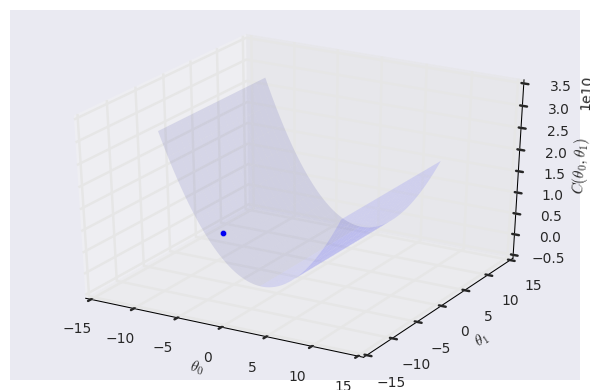

In [149]:
def plot_surface(x, y, z, labels = { 'x': '', 'y': '', 'z': '' }):
    axes = plt.gca(projection = '3d')
    axes.plot_surface(x, y, z, alpha = 0.1)

    axes.set_xlabel(labels['x'])
    axes.set_ylabel(labels['y'])
    axes.set_zlabel(labels['z'])
    
    plt.tight_layout()

X, Y   = np.meshgrid(theta0, theta1)
Z      = np.atleast_2d(errors)

labels = { 'x': '$\\theta_{0}$', 'y': '$\\theta_{1}$', 'z': '$C(\\theta_{0}, \\theta_{1})$' }
plot_surface(X, Y, Z, labels)

axes   = plt.gca(projection = '3d')
# plotting Cmin
axes.scatter(mintheta0, mintheta1, minerror)

plt.show()

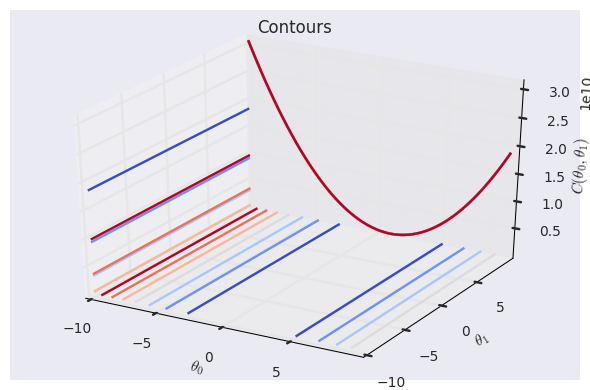

In [150]:
axes = plt.gca(projection = '3d')

axes.contour(X, Y, Z, zdir = 'x', offset = np.amin(X), cmap = cm.coolwarm)
axes.contour(X, Y, Z, zdir = 'y', offset = np.amax(Y), cmap = cm.coolwarm)
axes.contour(X, Y, Z, zdir = 'z', offset = np.amin(Z), cmap = cm.coolwarm)

axes.set_xlabel('$\\theta_{0}$')
axes.set_ylabel('$\\theta_{1}$')
axes.set_zlabel('$C(\\theta_{0}, \\theta_{1})$')

plt.title('Contours')

plt.tight_layout()
plt.show()

##### Q. "Great! We can now plug in these parameters and have our best fit line."

Not really. In our first example, we considered $\theta_{0} = 0$ whereas in our second example we limited our range for $\theta_{0} = [-10, 10)$. Both of these examples have resulted in a different minimized error, i.e. we limited our sack of $\theta$ values and then went on a hunt for our parameters that minimizes our cost function. Many sacks of $\theta$s results many minimized errors but then, what would be our **optimal solution**? Our approach of trying many permutations of these ranges is not a great one. So let us refer to our graph once again.

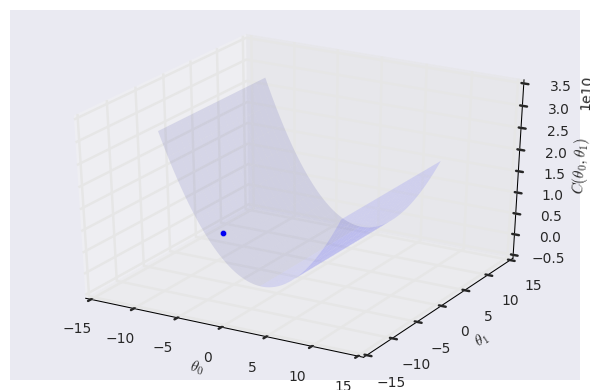

In [151]:
plot_surface(X, Y, Z, labels)

# plotting Cmin
axes = plt.gca(projection = '3d')
axes.scatter(mintheta0, mintheta1, minerror)

plt.show()

Our minimized error (blue dot) is no way near to the steepest point downhill that surface. What could then be another solution to reach to our steepest point?

**ST**

One way to realize this problem is to imagine a scenario wherein you are placed at a random point on the graph. Consider taking small iterative steps such that you're moving all the way dowhill upto a point wherein whichever step you may take in any direction does not lead you further downhill.

In mathematics, we call this as the **Gradient Descent Algorithm** which in simpler terms means *"move downhill by taking very small steps until you cannot move further downhill."* We call this least downhill point (with respect to the observer) as a **point of convergence**.

### Gradient Descent Algorithm

We can now formulate our Gradient Descent Algorithm as follows:

Let $\alpha$ be the learning rate (how small our step must be), then

$repeat$
$$\theta_{j} := \theta_{j} - \alpha\frac{\partial C(\theta)}{\partial \theta_{j}}$$
$until$ $convergence$

One must note that this is a parallel operation, i.e. each of these assignments are updated simultaneously. (*we look towards all possible directions and only then take a step*)

**ST**

The $:=$ operator is an assignment operator (updating a new value for the said variable) whereas the $\frac{\partial C(\theta)}{\partial \theta_{j}}$ factor denotes the rate of change of our cost function influenced by all variables in the parameter set $\theta$ with respect to an individual parameter $\theta_{j}$.

Consider this factor to be somewhat a GPS compass (covering a limited surface area). Our GPS is completely aware of the shape of our hill and guides us which direction should we move towards. If the factor were to be a positive large value, then our step would be equally large moving towards a lesser (big jump) $\theta_{j}$ value. Similarly, if our factor to be a negative small value, our step would be moving towards a greater (small jump) $\theta_{j}$ value.

One needs to observe for the fact that if $\alpha$ (our learning parameter) were to be very small, the algorithm would take a great amount of time to reach a point of convergence. Whereas in case where the $\alpha$ were to be comparatively a larger value, we may overshoot the point of convergence and may even tend to diverge.

Let's consider $C(\theta)$ and compute its partial derivative with respect to $\theta_{j}$, we then get.

$$\frac{\partial C(\theta)}{\partial \theta_{j}} = \frac{1}{m} \sum_{i = 1}^{m} (predict_{\theta}(x^{(i)}) - y^{(i)}) \cdot x_{j}^{(i)}$$

##### Q. "Hmm. This seems to be a better approach. Can we now plug in the parameter values we recieve from GDA?"

Well, yes. Our graph has a single point of convergence which denotes the **global minima** simply because of the quadratic nature of our function $C(\theta)$. On our two-dimensional graph, we observed a parabolic plot (a convex function) and raising a parabola to higher dimensions thereby also results a convex function. No matter what, we'll always have a single point of convergence. So yes. We must thank our quadratic cost function for helping us get away with local minimas.

We can now implement our Gradient Descent Algorithm as follows:

In [152]:
# def gradient_descent(features, labels, parameters, nsamples, predict, learning_rate = 0.001):
#     predictions = predict(features, parameters)
#     error       = predictions - labels
    
#     features    = np.insert(features, 0, 1, axis = 1)
    
#     dcost       = (1.0 / nsamples) * np.dot(np.transpose(error), features)
#     parameters  = parameters - learning_rate * np.transpose(dcost)
    
#     return parameters

In [153]:
# iterations = 10
# parameters = np.random.randn(2, 1)

# for i in range(iterations):
#     parameters = gradient_descent(x, y, parameters, nsamples, regressor.predict)
#     prediction = regressor.predict(x, parameters)
#     error      = mean_squared_error(prediction, y, nsamples)
#     print(error)
    
#     plt.plot(i, error, marker = '.', color = 'blue')
    
# plt.grid()
# plt.show()

# plt.scatter(x, y)
# plt.plot(x, regressor.predict(x, parameters))

Let's discuss another kind of Supervised Learning problems.

#### 3.A.b Classification

Let's consider yet another data set to work on in order to understand what Classification is all about. We'll consider a famous data set provided by `scikit-learn` - [Ronald Fisher's **iris** data set](https://en.wikipedia.org/wiki/Iris_flower_data_set) provided under `load_iris()`. The data set maps 4 different attributes namely (sepal length & width, petal length & width) to a given iris species from a set of 3 (setosa, versicolor and virginica).

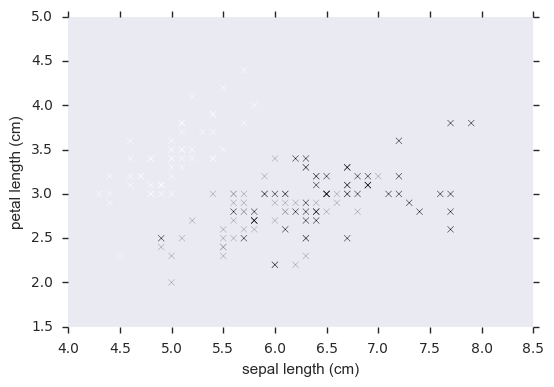

In [154]:
from sklearn.datasets import load_iris

iris    = load_iris()
x       = iris.data[:,0] # sepal length (cm)
y       = iris.data[:,1] # petal length (cm)

plt.scatter(x, y, marker = 'x', c = iris.target)
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
    
plt.grid()
plt.show()

In the case of the above graph, we see that ***setosa*** species (blue) has a small sepal length with a comparatively larger petal length, whereas ***virginica*** species (red) has a larger sepal length but a smaller petal length in comparision. Such a kind of problem could be termed as a **Classification** problem, i.e. choosing a categorical output based on some input variables (categorical or numeric). If we were to draw boundaries within the scatter plot, we could approximately classify a given iris species from a list of 3 based on the sepal length and petal length provided.

Machine Learning is all about building those boundaries.

#### 3.A.b.i Logistic Regression

#### Logistical Function
A logistical function can be denoted as:
$$f(x) = \frac{H}{1 + e^{-k(x - x_{0})}}$$
where $H$ is the maximum value, $k$ is its steepness and $x_{0}$ is the value of the function's mid-point.

In [155]:
def logistic(x, max = 1, steepness = 1, mid = 0):
    return max / (1 + np.exp(- steepness * (x - mid)))

In [156]:
# testing our logistic function using a range(-10, 10, 0.01)
x = np.arange(-10, 10, 0.1)
s = np.arange(0, 1, 0.2)

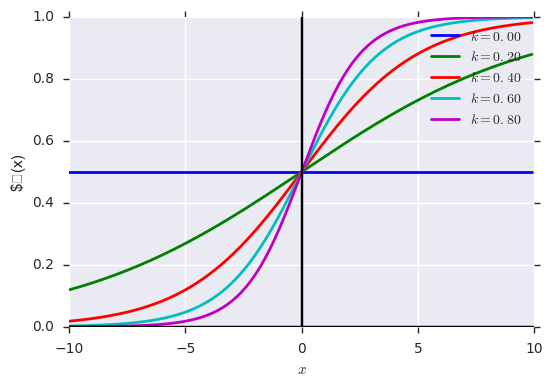

In [157]:
# plotting a sigmoid function and its first order derivative
_, ax   = plt.subplots()
legends = [ ] 

for i in s:
    ax.plot(x, logistic(x, steepness = i), lw = 2)
    legends.append('$k = %.2f$' % i)

ax.grid(True, which = 'both')

ax.axhline(y = 0, color = 'k')
ax.axvline(x = 0, color = 'k')

plt.legend(legends)

plt.xlabel('$x$')
plt.ylabel("$\f(x)")

plt.show()

## 4. Artificial Neural Networks

An Artificial Neural Network (hereby, ANN) is a learning model that is based on the way a Biological Neural Network works.

Such models prove effective in cases wherein our data set is not *linearly seperable* i.e., one cannot seperate input to output mappings by merely drawing a line.

#### Biological Neuron
Our biological neural network system consists of billions of interconnected small units called as neurons. Let's look at a simplistic biological neuron and visualize our artifical model from it later.

![](./img/biological-neuron.png)

So, how do ANNs work? We now describe the smallest computational unit of an ANN - *neuron*.

#### McCulloch-Pitts' Neuron

![](./img/neuron.png)

Image Source: [[6]](#References)

Each neuron is connected to other neurons by a connection we call as the **synapse**. Each synapse has a weight $w$ associated to it. Consider this as the strength of the neuron that can be updated to increase the performance of the architecture. At each neuron, a $net$ is calculated by a summation of the products of each input to the neuron through a synapse and the weight associated to it on that synapse. The output of a neuron is given by $\phi(net)$ where $\phi$ denotes the activation function of that neuron. An additional neuron known as the **bias** having an input $+1$ is attached to each neuron of an ANN.

Let $w_{ij}$ be the weight of a synapse/connection from the $i^{th}$ neuron to the $j^{th}$ and $b_{j}$ is the bias weight to the $j^{th}$ neuron. Let the input from the $i^{th}$ neuron be $x_i$. Then, $net_j$ can be defined as
$$net_j = \sum_{i = 1}^{m} w_{ij} x_i + b_{j}$$
where $m$ is the number of neurons in the layer where neuron $i$ exists.

The output from the $j_{th}$ neuron will then be
$$x_{j} = \phi(net_{i})$$

where $\phi(net_{j})$ is the activation function present at neuron $i$. Also, $x_{j}$ either acts as the output or an input from neuron $j$ to say, neuron $k$.

**ST**

Assume a neuron having a single input, say $x_{1}$ coming from neuron $1$ to neuron $2$ connected by a weight $w_{12}$. Also, declaring a bias input having an input 1 and a weight $b_{j}$ associated to its synapse. We can then formulate the output $y$ at neuron $2$ as,
$$y = \phi(w_{12} x_1 + b_{2})$$

We notice that the above equation represents a Univariate Logistic Regressor, where $w_{12}$ denotes the slope of a line and $b_{2}$ denotes the y-intercept. Hence, each ***neuron in itself is a logistic unit.***

#### 4.A Activation Functions

We provide an exhaustive list of various activation functions and their implementations.
- [Identity](#Identity-Function)
- [Heaviside](#Heaviside-Function)
- [Sigmoid](#Sigmoid-Function)
- [Bipolar Sigmoid](#Bipolar-Sigmoid-Function)
- [Complementary log-log](#Complementary-log-log-Function)
- [Hyperbolic Tan](#Hyperbolic-Tan-Function)
- [Yann LeCun's Hyperbolic Tan](#Yann-LeCun's-Hyperbolic-Tan-Function)
- [ReLU (Rectifier Linear Unit) / Ramp](#ReLU-Function)
- [Absolute](#Absolute-Function)

#### Identity Function
$$\phi(x) = x$$

In [158]:
# an identity function
def identity(x, derivative = False):
    if derivative:
        return np.sign(x)
    return x

In [159]:
# testing our activation functions using a range(-10, 10, 0.01)
x = np.arange(-10, 10, 0.01)

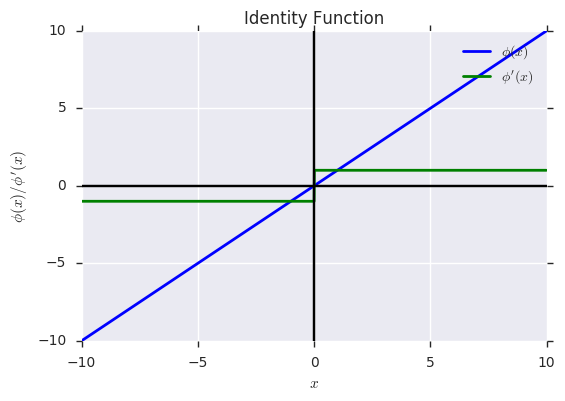

In [160]:
# plotting an identity function and its first order derivative
_, ax = plt.subplots()
ax.plot(x, identity(x)                   , lw = 2)
ax.plot(x, identity(x, derivative = True), lw = 2)

ax.grid(True, which = 'both')

ax.axhline(y = 0, color = 'k')
ax.axvline(x = 0, color = 'k')

plt.title('Identity Function')

plt.legend(["$\phi(x)$", "$\phi'(x)$"])

plt.xlabel('$x$')
plt.ylabel("$\phi(x)/\phi'(x)$")

plt.show()

#### Heaviside Function

In [161]:
# a heaviside function
def heaviside(x):
    return 0.5 * (np.sign(x) + 1)

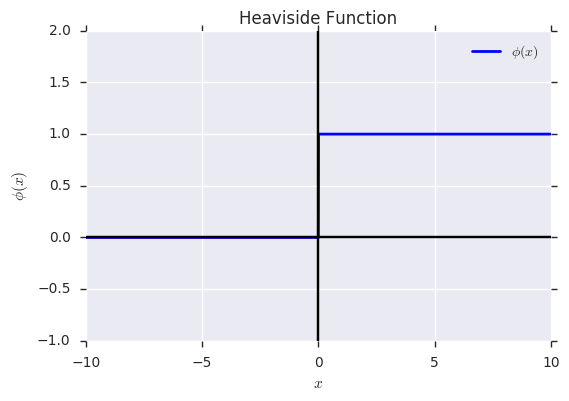

In [162]:
# plotting a heaviside function
_, ax = plt.subplots()
ax.plot(x, heaviside(x), lw = 2)

ax.grid(True, which = 'both')

ax.axhline(y = 0, color = 'k')
ax.axvline(x = 0, color = 'k')

plt.title('Heaviside Function')

plt.legend(["$\phi(x)$"])

plt.xlabel('$x$')
plt.ylabel("$\phi(x)$")

# adding margins
margin         = 1
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, y1 - margin, y2 + margin))
plt.show()

#### Sigmoid Function
$$\phi(x) = \frac{1}{1 + e^{-x}}$$

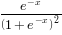

In [163]:
# finding the first order derivative of a sigmoid function
s = sp.Symbol('x')            # denoting a sympy symbol
f = 1 / (1 + sp.exp(-s))      # a sigmoid function
sp.diff(f)                    # differentiating the equation

In [164]:
# a sigmoid function
def sigmoid(x, derivative = False):
    e = np.exp(-x)
    
    if derivative:
        return e / np.power(1 + e, 2)
    return 1 / (1 + e)

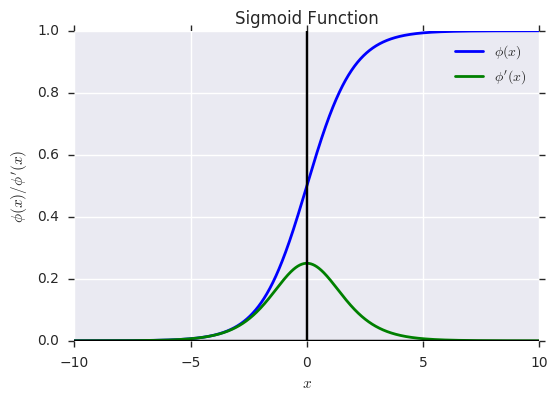

In [ ]:
# plotting a sigmoid function and its first order derivative
_, ax = plt.subplots()
ax.plot(x, sigmoid(x)                   , lw = 2)
ax.plot(x, sigmoid(x, derivative = True), lw = 2)

ax.grid(True, which = 'both')

ax.axhline(y = 0, color = 'k')
ax.axvline(x = 0, color = 'k')

plt.title('Sigmoid Function')

plt.legend(["$\phi(x)$", "$\phi'(x)$"])

plt.xlabel('$x$')
plt.ylabel("$\phi(x)/\phi'(x)$")

plt.show()

#### Bipolar Sigmoid Function
$$\phi(x) = \frac{1 - e^{-x}}{1 + e^{-x}}$$

In [ ]:
# finding the first order derivative of a bipolar sigmoid function
f = (1 - sp.exp(-s)) /  (1 + sp.exp(-s))     # a bipolar sigmoid function
d = sp.diff(f)                               # differentiating the equation
sp.simplify(d)                               # simplifying the equation

In [ ]:
# a bipolar sigmoid function
def bipolar_sigmoid(x, derivative = False):
    e = np.exp(-x)
    
    if derivative:
        e = np.exp(x)
        return 2 * e / np.power(1 + e, 2)
    return (1 - e) / (1 + e)

In [ ]:
# plotting a sigmoid function and its first order derivative
_, ax = plt.subplots()
ax.plot(x, bipolar_sigmoid(x)                   , lw = 2)
ax.plot(x, bipolar_sigmoid(x, derivative = True), lw = 2)

ax.grid(True, which = 'both')

ax.axhline(y = 0, color = 'k')
ax.axvline(x = 0, color = 'k')

plt.title('Bipolar Sigmoid Function')

plt.legend(["$\phi(x)$", "$\phi'(x)$"])

plt.xlabel('$x$')
plt.ylabel("$\phi(x)/\phi'(x)$")

plt.show()

#### Complementary log-log Function
$$\phi(x) = 1 - e^{-e^{x}}$$

In [ ]:
# finding the first order derivative of a cloglog function
f = 1 - sp.exp(-sp.exp(s))        # a cloglog function
d = sp.diff(f)                    # differentiating the equation
sp.simplify(d)

In [ ]:
# a complementary log-log function
def cloglog(x, derivative = False):
    e = np.exp(x)
    
    if derivative:
        return np.exp(x - e)
    return 1 - np.exp(-e)

In [ ]:
# plotting a sigmoid function and its first order derivative
_, ax = plt.subplots()
ax.plot(x, cloglog(x)                   , lw = 2)
ax.plot(x, cloglog(x, derivative = True), lw = 2)

ax.grid(True, which = 'both')

ax.axhline(y = 0, color = 'k')
ax.axvline(x = 0, color = 'k')

plt.title('Complementary Log Log')

plt.legend(["$\phi(x)$", "$\phi'(x)$"])

plt.xlabel('$x$')
plt.ylabel("$\phi(x)/\phi'(x)$")

# adding margins
margin         = 0.5
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, y1 - margin, y2 + margin))
plt.show()

#### Hyperbolic Tan Function
$$\phi(x) = tanh(x)$$

In [ ]:
# finding the first order derivative of a tanh function
f = sp.tanh(s)
sp.diff(f)

In [ ]:
# a tanh function
def tanh(x, derivative = False):
    if derivative:
        return 1 - np.power(np.tanh(x), 2)
    return np.tanh(x)

In [ ]:
# plotting a tanh function and its first order derivative
_, ax = plt.subplots()
ax.plot(x, tanh(x)                   , lw = 2)
ax.plot(x, tanh(x, derivative = True), lw = 2)

ax.grid(True, which = 'both')

ax.axhline(y = 0, color = 'k')
ax.axvline(x = 0, color = 'k')

plt.title('Hyperbolic Tan Function')

plt.legend(["$\phi(x)$", "$\phi'(x)$"])

plt.xlabel('$x$')
plt.ylabel("$\phi(x)/\phi'(x)$")

plt.show()

#### Yann LeCun's Hyperbolic Tan Function
This activation function is best to use when:
* Our data set to be fed into the network is *normalized*.
* Weights of our network are initialized using Yann LeCun's weight initialization method.

For more details, see [[7]](#References)

In [ ]:
def tanh_lecun(x, derivative = False):
    a = 1.7159
    b = (2.0 / 3.0)
    
    if derivative:
        return a * (b - np.tanh(b * x))
    return a * np.tanh(x)

In [ ]:
# plotting yann lecun's tanh function and its first order derivative
_, ax = plt.subplots()
ax.plot(x, tanh_lecun(x)                   , lw = 2)
ax.plot(x, tanh_lecun(x, derivative = True), lw = 2)

ax.grid(True, which = 'both')

ax.axhline(y = 0, color = 'k')
ax.axvline(x = 0, color = 'k')

plt.title("Yann LeCun's Hyperbolic Tan Function")

plt.legend(["$\phi(x)$", "$\phi'(x)$"])

plt.xlabel('$x$')
plt.ylabel("$\phi(x)/\phi'(x)$")

plt.show()

#### ReLU Function

In [ ]:
# a relu (Rectifier Linear Unit) function
def relu(x, derivative = False):
    if derivative:
        # the derivative of a ramp function is nothing but a heaviside function
        return heaviside(x)
    return np.maximum(0, x)

In [ ]:
# plotting a relu function and its first order derivative
_, ax = plt.subplots()
ax.plot(x, relu(x)                   , lw = 2)
ax.plot(x, relu(x, derivative = True), lw = 2)

ax.grid(True, which = 'both')

ax.axhline(y = 0, color = 'k')
ax.axvline(x = 0, color = 'k')

plt.title("ReLU Function")

plt.legend(["$\phi(x)$", "$\phi'(x)$"])

plt.xlabel('$x$')
plt.ylabel("$\phi(x)/\phi'(x)$")

plt.show()

#### Absolute Function

In [ ]:
# an absolute function
def absolute(x):
    return np.abs(x)

In [ ]:
# plotting a relu function and its first order derivative
_, ax = plt.subplots()
ax.plot(x, absolute(x), lw = 2)

ax.grid(True, which = 'both')

ax.axhline(y = 0, color = 'k')
ax.axvline(x = 0, color = 'k')

plt.title("Absolute Function")

plt.legend(["$\phi(x)$"])

plt.xlabel('$x$')
plt.ylabel("$\phi(x)$")

plt.show()

#### 2.2 Weight Initialization Methods
1. Gaussian (Normal) Distribution with a standard deviation $\sigma = 0.01$

2. Yann LeCun's Weight Initialization Method: Yann LeCun states that if the data is been normalized and `tanh_lecun` is been used, then the weights could be initialized from a distribution having a mean $\mu = 0$ and a standard deviation $\sigma = {\frac{1}{\sqrt{m}}}$ where $m$ is the number of inputs to a node.

3. Xavier / Glorot Weight Initialization Method: If $m$ is the number of fan-in nodes and $n$ is the number of fan-out nodes, then the weights could be initialized choosing a random value from a Uniform Distribution in the range $$U \sim [\,{\sqrt{\frac{6}{m + n}}}, {\sqrt{\frac{6}{m - n}}}]\,$$

##### Probability Density Function (Uniform Distribution)
$$P(x) = \frac{1}{b - a}$$

##### Probability Density Function (Normal Distribution)
$$P(x) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x - \mu)^2}{2\sigma^2}}$$

In order to randomize weights around 0, we pick out random values from the said probability density function.

In [ ]:
# a probability density function for a Normal Distribution
def pdf_normal(x, mu = 0.0, sigma = 1.0):
    c = 2 * np.power(sigma, 2)
    return (1.0 / np.sqrt(np.pi * c)) * np.exp(-(np.power(x - mu, 2) / c))

In [ ]:
# plotting a Uniform Distribution
def plot_uniform(low = 0.0, high = 1.0, bins = 100, size = 1000, title = None):
    range      = np.random.uniform(low, high, size)
    _, bins, _ = plt.hist(range, bins, normed = True)
    plt.legend(['$U \sim [\,%.2f, %.2f]\,$' % (low, high)])
    
    if title is not None:
        plt.title(title)
        
    plt.show()

In [ ]:
# a test case to plot a Uniform Distribution
plot_uniform()

In [ ]:
# plotting a Normal Distribution and its PDF
def plot_normal(mu = 0.0, sigma = 1.0, bins = 100, size = 1000, title = None):
    range      = np.random.normal(mu, sigma, size)
    _, bins, _ = plt.hist(range, bins, normed = True)
    plt.plot(bins, pdf_normal(bins, mu, sigma), lw = 2, color = 'r')
    
    if title is not None:
        plt.title(title)
        
    plt.legend(['$\mu = %0.2f, \sigma = %0.2f$' % (mu, sigma)])
    
    plt.show()

In [ ]:
# a test case to plot a Normal Distribution and its PDF
plot_normal()

In [ ]:
# Our Artificial Neural Network class
class ANN:
    # available weight initialization methods
    RANDN          = 1
    LECUN_UNIFORM  = 2
    LECUN_NORMAL   = 3
    XAVIER_UNIFORM = 4
    XAVIER_NORMAL  = 5
    
    # available activation functions 
    IDENTITY       = identity
    CLOGLOG        = cloglog
    RELU           = relu
    SIGMOID        = sigmoid
    TANH           = tanh
    TANH_LECUN     = tanh_lecun
    HEAVISIDE      = heaviside
    ABSOLUTE       = absolute
    
    '''
    @arguments
        sizes    - a list containing the number of neurons in each layer inclusive of the input and output layer.
        wimethod - the initialization method for initializating weights and biases.
    '''    
    def __init__(self, sizes, wimethod = RANDN, debug = False):
        self.log      = Log(debug) # a logger for debugging
        
        self.nlayers  = len(sizes) # number of layers inclusive of i/p layer
        self.ninputs  = sizes[ 0]  # number of inputs
        self.noutputs = sizes[-1]  # number of outputs
        self.sizes    = sizes      # the topological structure of the neural network
        self.neurons  = sum(sizes) # number of neurons within the architecture
        
        self.biases, self.weights = self._init_weights(wimethod)
        
        # logging initial weights
        self.log.debug("ANN._init_weights: Initial Weights: ")        
        if self.log.debuggable:
            for i, w in enumerate(self.weights):
                self.log.debug('weight(%i)' % (i + 1))
                self.log.display(npa_to_latex_bmatrix_string(w))
                
        # logging initial biases                
        self.log.debug("ANN._init_weights: Initial Biases: ")       
        if self.log.debuggable:
            for i, b in enumerate(self.biases):
                self.log.debug('bias(%i)' % (i + 1))
                self.log.display(npa_to_latex_bmatrix_string(b))
                
    def _init_weights(self, wimethod = RANDN):
        sizes   = self.sizes
        
        # initialize weights to 0 and then "break the symmetry" [3]
        weights = [np.zeros(shape = (x, y)) for x, y in zip(sizes[:-1], sizes[1:])]
        biases  = [np.zeros(shape = (1, y)) for y    in sizes[1:]]
        
        if wimethod is ANN.RANDN:
            self.log.debug("ANN._init_weights: Initialization Weights using a Gaussian Distribution (mu = 0, sigma = 0.01).")
            # a random gaussian distribution with standard deviation = 0.01
            mu      = 0.0
            sigma   = 0.01
            weights = [np.random.normal(size = (x, y), loc = mu, scale = sigma) for x, y in zip(sizes[:-1], sizes[1:])]
            biases  = [np.random.normal(size = (1, y))                          for y    in sizes[1:]]
            
            self.log.debug('ANN._init_weights: Plotting a Probability Density Function for weights.')
            if self.log.debuggable:
                plot_normal(mu = mu, sigma = sigma, title = 'Initial Weights Distribution for all Layers.');
                
        if wimethod is ANN.LECUN_UNIFORM:
            self.log.debug("ANN._init_weights: Initialization Weights using Yann LeCun's method (Uniform Distribution).")
            # to be implemented
            
        if wimethod is ANN.LECUN_NORMAL:
            self.log.debug("ANN._init_weights: Initialization Weights using Yann LeCun's method (Normal Distribution).")
            mu     = 0.0
            
            for i in range(self.nlayers - 1):
                m     = sizes[i]               # fan-in
                n     = sizes[i + 1]           # fan-out
                
                sigma = np.sqrt(1.0 / m)
                
                weights[i] = np.random.normal(size = (m, n)) * sigma
                biases [i] = np.random.normal(size = (1, n))
                
                u     = i + 1 # layer x
                v     = i + 2 # layer y
                
                self.log.debug('ANN._init_weights: Plotting a Probability Density Function for weights (%i, %i).' % (u, v))
                if self.log.debuggable:
                    plot_normal(mu = mu, sigma = sigma, title = 'Initial Weight Distribution for (%i, %i)' % (u, v))
                                                                              
        if wimethod is ANN.XAVIER_UNIFORM:
            self.log.debug("ANN._init_weights: Initialization Weights using Xavier's method (Uniform Distribution).")
            
            for i in range(self.nlayers - 1):
                m = sizes[i]               # fan-in
                n = sizes[i + 1]           # fan-out
                
                r = np.sqrt(6.0 / (m + n)) # range
                
                weights[i] = np.random.uniform(low = -r, high = r, size = (m, n))
                biases [i] = np.random.uniform(low = -r, high = r, size = (1, n))
                
                u     = i + 1 # layer x
                v     = i + 2 # layer y
                
                self.log.debug('ANN._init_weights: Plotting a Uniform Distribution for weights (%i, %i).' % (u, v))
                if self.log.debuggable:
                    plot_uniform(low = -r, high = r, title = 'Initial Weight Distribution for (%i, %i)' % (u, v))
                
        if wimethod is ANN.XAVIER_NORMAL:
            self.log.debug("ANN._init_weights: Initialization Weights using Xavier's method (Normal Distribution).")
            mu = 0.0
            
            for i in range(self.nlayers - 1):
                m     = sizes[i]               # fan-in
                n     = sizes[i + 1]           # fan-out
                
                sigma = np.sqrt(3.0 / (m + n)) # standard deviation
                
                weights[i] = np.random.normal(size = (m, n)) * sigma
                biases [i] = np.random.normal(size = (1, n))
                
                u     = i + 1 # layer x
                v     = i + 2 # layer y
                
                self.log.debug('ANN._init_weights: Plotting a Probability Density Function for weights (%i, %i).' % (u, v))
                if self.log.debuggable:
                    plot_normal(mu = mu, sigma = sigma, title = 'Initial Weight Distribution for (%i, %i)' % (u, v))
        
        return (biases, weights)
    
    def view(self):
        graph = nx.DiGraph()
        
        # to be implemented
        
        nx.draw(graph, node_color = 'y')

In [ ]:
class FNN(ANN):
    def __init__(self, *args, **kwargs):
        ANN.__init__(self, *args, **kwargs)
        
    def _feedforward(self, x, activation = ANN.SIGMOID):
        self.log.debug('FNN._feedforward: Feeding an input: ' + str(x))
        
        table  = PrettyTable(['LAYER.', 'WEIGHT', 'BIAS', 'NET', 'f(NET)'])

        x      = np.atleast_2d(x)
        print(x)
        
        input  = [ ]                         # stores the inputs  to   each layer
        output = [x]                         # stores the outputs from each layer

        for i in range(self.nlayers - 1):
            w = self.weights[i]
            b = self.biases [i]
            
            z = np.add(np.dot(x, w), b)      # z   = x.w + b, the net of a given neuron
            x = activation(z)                              # a   = f(z)   , triggering the activation function

            input .append(z)
            output.append(x)

            table.add_row([i + 1,
                           npa_to_latex_bmatrix_string(w),
                           npa_to_latex_bmatrix_string(b),
                           npa_to_latex_bmatrix_string(z),
                           npa_to_latex_bmatrix_string(x)])

        self.log.debug('FNN._feedforward: For each iteration.')
        self.log.display(table.get_html_string())

        self.log.debug('FNN._feedforward: Done. Model generated: ' + str(x))

        return { 'input': input, 'output': output }
        
    def fit(self, features, labels, activation = ANN.SIGMOID, learning_rate = 0.01, epochs = 10000):
        self.activation   = activation
        
        choice            = random.randrange(self.ninputs) # choosing a random feature to feed into the network
        
        # feeding the feature once through the network
        # model states the inputs and outputs of each layer
        model             = self._feedforward(features[choice], activation)
        y                 = model['output'][-1] # the output recieved from the output layer
                
        # using mean squared error
        error             = mse(labels[choice], y)
        self.log.debug('FNN.fit: Error recieved: ' + str(error))
        
        # initiating the backpropagation algorithm
        
        # derivative of the cost function
        # = - (expected_output - predicted_output) x f'(input to output layer)
        delta             = (y - labels[choice]) * self.activation(model['input'][-1], derivative = True)        
        self.log.debug('FNN.fit: BackPropagation Error from output layer: ' + str(delta))
        
        delta_weights     = [np.zeros(w.shape) for w in self.weights] # delta weights list
        delta_biases      = [np.zeros(b.shape) for b in self.biases]  # delta biases  list
        
        table             = PrettyTable(['LAYER.', 'DELTA', 'ΔW', 'ΔB'])
        round             = 4
        
        delta_weights[-1] = np.dot(np.transpose(model['output'][-2]), delta)
        delta_biases [-1] = delta
        
        table.add_row([self.nlayers,
                       npa_to_latex_bmatrix_string(np.round(delta            , round)),
                       npa_to_latex_bmatrix_string(np.round(delta_weights[-1], round)),
                       npa_to_latex_bmatrix_string(np.round(delta_biases [-1], round))])
        
        for i in range(2, self.nlayers):
            z                 = model['input' ][-i]
            weight            = self.weights[-i + 1]
            
            delta             = np.dot(delta, np.transpose(weight)) * self.activation(z, derivative = True)
            
            a                 = model['output'][-i - 1]
            
            delta_weights[-i] = np.dot(np.transpose(a), delta)
            delta_biases [-i] = delta
            
            table.add_row([self.nlayers - i + 1,
                           npa_to_latex_bmatrix_string(delta),
                           npa_to_latex_bmatrix_string(delta_weights[-i]),
                           npa_to_latex_bmatrix_string(delta_biases [-i])])
        
        self.log.debug('FNN.fit: For each BackPropagation iteration.')
        self.log.display(table.get_html_string())
        
    def predict(self, features):
        self.log.debug('FNN.predict: Attempting to predict the outputs.')
        
        outputs = [ ] # a list of outputs recieved for each feature
        
        for i in features:
            # feeding the feature through the network
            model  = self._feedforward(i, self.activation)
            output = model['output'][-1]
            
            self.log.debug('FNN.predict: Prediction for ' + str(i) + ' recieved is ' + str(output))
            
            outputs.append(output)
            
        return outputs

In [ ]:
features     = np.asarray([[0, 0], [0, 1], [1, 0], [1, 1]])
labels       = [[0], [1], [1], [0]]

nfeatures    =  len(features[0])  # number of features
nlabels      =  len(labels[0])    # number of labels
sizes_hidden =  [3]               # 1 hidden layer with 3 neurons

sizes        = [nfeatures] + sizes_hidden + [nlabels]

In [ ]:
fnn = FNN(sizes, wimethod = ANN.XAVIER_NORMAL, debug = True)
fnn.fit(features, labels)

### Recurrent Neural Networks (RNNs)

Consider the case of Feedforward Neural Networks. Each sample from the training set passed through the network thereby resulting a desired output. In no case did the next input to be fed showed any dependency with its previous sample. But what about training samples that exhibit relationships between their inputs? At the same time, what about a training sample that denotes an output dependent on not only the current sample but also its previous training samples? One of the answers to this are languages; and here is where Recurrent Nerual Networks comes to our rescue.

A Recurrent Neural Network (hereby, RNN) is a kind of an Artificial Neural Network that considers the question *at which time-step did you feed your input?* This encourages us to use RNNs for **modelling sequences**.

#### Architecture
A *vanilla* Recurrent Neural Network's (hereby, RNN) architecture can be defined as follows:

\begin{align*}
h_{t} &= \theta\hspace{2mm}\phi(h_{t-1}) + \theta_{x}x_{t} \\
y_{t} &= \theta_{y}\phi(h_{t})
\end{align*}

where
$x_{t}$ is the input vector at time-step $t$, $h_t$ and $h_{t-1}$ denote the state of the hidden layer at time-step $t$ and $t-1$ respectively, $y_{t}$ denotes the output vector at time $t$, $\theta_{x}$ denotes the parameter (weight) used to condition the input vector $x$ at time-step $t$, $\theta_{h_{t-1}}$ denotes the parameter (weight) used to condition the hidden layer $h$ at time-step $t-1$, $\theta_{y}$ denotes the parameter (weight) used to condition the hidden layer $h$ at time-step $t$ and $\phi(x)$ denotes the activation function (typically, a non-linear function). Also, $h_{0}$ would be the initialization vector at time-step $t = 1$.

A nice way to look at the architecture is the *"time-step dependency"* relationship between $h_{t}$ and $h_{t-1}$ it exhibits.

#### The "Vanishing" and "Exploding" Gradient Problem

In order to estimate the error recieved from the RNN, we'd have to consider the sum of error derivatives with respect to $\theta$ generated at each time-step. Hence,

\begin{align*}
\frac{\partial E}{\partial \theta} &= \sum_{t = 1}^{S} \frac{\partial E_{t}}{\partial \theta} \\
\frac{\partial E_{t}}{\partial \theta} &= \sum_{k = 1}^{t} \frac{\partial E_{t}}{\partial y_{t}} \frac{\partial y_{t}}{\partial h_{t}} \frac{\partial h_{t}}{\partial h_{k}} \frac{\partial h_{k}}{\partial \theta_{t}}
\end{align*}

where $S$ is the number of time-steps. Notice how the last two partial derivative factors at each time-step also relies on the previous $k$ time-steps. The term $\frac{\partial h_{t}}{\partial h_{k}}$ denotes the partial derivative of the hidden layer at time-step $t$ with respect to the partial derivative of all the time-steps previous to it and can be given as:

\begin{align*}
\frac{\partial h_{t}}{\partial h_{k}} &= \prod_{i = k + 1}^{t} \frac{\partial h_{i}}{\partial h_{i - 1}} \\
                                      &= \prod_{i = k + 1}^{t} \frac{\partial (\theta\phi(h_{i-1}) + \theta_{x}x_{i})}{\partial h_{i - 1}} \\
                                      &= \prod_{i = k + 1}^{t} \theta^{T} diag[\phi'(h_{i - 1})]
\end{align*}

### Long Short-Term Memory (LSTMs)
##### Solving the "Vanishing" and "Exploding" Gradient Problem

## 5. Genetic Algorithms
> *Survival of the fittest* - Charles Darwin, *On the Origin of Species*

Our ability to learn is in itself - evolutionary; and the principles behind Genetic Algorithms are no different. Of course, the very nature of evolution is nothing but cell optimization over time.

#### 1. Selection
We select individuals that seem a best fit to our objective function (or fitness function) that can survive for the next generation.
#### 2. Crossover
Our individuals of the next generation perform a genetic crossover (sharing genetic information) that aim to perform a better generation of individuals that can survive our fitness function.
#### 3. Mutation
Mutation occurs when there is a kind of deformation of genes by say, exposure to radiation. In practice, this can be achieved by randomizing our string to an extent to form new individuals that aim to try preserving some genetic diversity.
#### 4. Sampling
Our resultant genetic diversity now creates new offsprings from these individuals recieved.

We can now formulate a generalized algorithm for Genetic Algorithms as follows:


## Case Study 1
> Performance Analysis of
> 1. k Nearest Neighbours (k-NN)
> 2. Artificial Neural Networks (ANN)
> 3. Support Vector Machines (SVM)

> Using Cotton Germplasm Classification.

### Problem Statement
> Given a data set containing various features (germplasm) associated to six groups (Marker, Variety, Okra, New, BBR and JBWR) of cotton, build a learning model that is able to ***classify*** under which group does a given input set of features lie within.

Our data set is been provided by the Central Institute of Cotton Research (CICR), Nagpur, India.
What we have here is a ***multi-class classification problem***.

### Domain Knowledge
I solemly declare myself to be naive in the field of seed science. After some research (basically Googling), I came across this Doctoral Thesis [[13]](#References) by Dr. Harish S. that can help us understand more about Cotton Germplasm.

### Data Preprocessing
***Q. Why Preprocessing?***

As we have seen, Machine Learning algorithms although sound smart, but aren't smart enough. A raw data set holds a high dregree of noise (inconsistencies, discrepancies, etc.). The *GIGO* principle applies very well in our field of Machine Learning which states - ***"garbage in, garbage out"***, which means that if you were to feed inconsistent logic into your machine, you recieve equally flawed conclusions from it.

#### Human Intervention
Making our data representable into a tabular format requires some kind of human intervention. I initially recieved the data set in an Excel sheet. After a day of cleaning we successfully converted our [dirty data](https://docs.google.com/spreadsheets/d/1LMYli4mkWrAuDSihFQ6w6raAJbEfebs3VlJUXT1wk88/pubhtml) to a [cleaned one](https://docs.google.com/spreadsheets/d/1PQlCQvYvdGDidxtgnAQeIbcY6fdKuBVeS-6LSxo2xtk/pubhtml).

We shall follow a strict protocol [[12]](#References) of preprocessing our data which is as follows:
1. Data Cleaning
2. Data Integration
3. Data Reduction
4. Data Transformation

`sklearn` has an entire module called `preprocessing` that can help us with preprocessing our data set.

#### Loading our data set
Let's load our data set into a Pandas' DataFrame Object that can be further used to generate our training, validation and testing sets.

In [ ]:
path = './data/cotton/cotton.csv'
df   = pd.read_csv(path)

We can view a sample of our data set using `pandas.DataFrame.sample` method.

In [ ]:
number_of_samples = 3
df.sample(number_of_samples)

`pandas_profiling` is a great library to generate a comphrehensive report of your data set.

In [ ]:
profile = pp.ProfileReport(df)
profile.to_file(outputfile = './data/cotton/profile.html')

You can view the complete profile over [here](./data/cotton/profile.html).

#### 1. Data Cleaning
In order to increase the quality of our data set for analysis, some steps need to be considered for the following cases:
1. Missing Values
2. Duplicate Data
3. Inconsistent Data
4. Noise
5. Outliers

#### 1. Missing Values
We can get away with missing values by either:
1. Ignoring our missing values.
2. Deleting training tuples that contain missing values.
3. Substituting a value in place of a missing value.

Ignoring our missing values is certainly not the option since not all predictive models consider missing values (k-NN in this case). Secondly, deleting our training tuples with missing values could remove a large amount of relavant data that could help our model to learn better. `pandas` has a neat function called `DataFrame.dropna()` if you wish to consider deleting missing values *(not recommended)*.

Our third case would be clearly substituting a value in place of missing values. We call this as ***Imputation of Missing Values***. A wide range of stratergies and algorithms exists to impute missing values.

In [ ]:
df = df.fillna(df.mean())
df.sample(number_of_samples)

#### 4. Data Transformation
Our data set consists of a mixture of both categorical as well as numerical features. However, many machine learning models understand inputs only in terms of numbers. In order to convert our categorical data into numerical data, we need to use some kind of encoding system.

Let's assume the three kinds of categorical data we can come across:
* **Ordinal**, where the order of categories are important - for instance, the importance of $bad$ could be comparatively less than that of the importance of $good$.
* **Nominal**, where the order of categories are not important - for instance, $apple$, $banana$ or $orange$, etc.
* **Dichotomous**, where there exists just two categories - for instance, $male$ or $female$, $yes$ or $no$, etc.

On analysing our data set, we can conclude that each categorical feature within our data set is clearly ***nominal*** and ***dichotomous*** in nature.

Converting our nominal/dichotomous categories into something numeric, we use the **One-Hot Encoding** system. This kind of encoding system considers each nominal/dichotomous category as a seperate feature that takes a value either $1$ or $0$ if the corresponding feature holds that category or not.

`pandas` helps us to convert our categorical data into One-Hot vectors using the `get_dummies` function. In statistics, a dummy variable is nothing but a variable that takes a value $1$ or $0$ to indiciate the presence or absense of some literal.

In [ ]:
df = pd.get_dummies(df, prefix_sep = ' ')
df.sample(number_of_samples)

Such encoding schemes often tend to increase the number of features by a huge amount, thus adding a computation overhead on our learning models. In our case, these columns increased almost three times the initial number of columns (37 to 99).

### Feature Scaling
Assuming our data set, one possibly cannot compare say *fibre color* to *plant height*, that would be comparing apples to oranges. Our data set consists of incomparable features and hence must be squashed to some uniform range. We call this stage as ***Feature Scaling***.

#### Normalization
We can define our normalized data set within the range $[0, 1]$ as:
$$X := \frac{X - X_{min}}{X_{max} - X_{min}}$$

In [ ]:
# normalization
df = (df - df.min()) / (df.max() - df.min())
df.sample(number_of_samples)

### Training/Testing Splits

Our learning models require a unit that can quantify the overall performance of our model on our data set. Our training phase relies heavily on our data set and on our defined parameters (for parameteric models only) in order to build itself as a successful predictive model. However, using the entire data set would mean that our goal seems to be fitting our model to our data set alone, which was never the objective in the first place. Exhaustively utilizing the data set and tweaking parameters would possibly result in an ideal model and not a predictiion model. We call this as ***overfitting***, an ML engineer's worst nightmare.

One good way to avoid this would be to split our data set into two parts of some defined ratio - a training set and a testing set. Random tuples from the data set can be added into our testing set that can be used to estimate how well our model performs for our data set. `scikit-learn` has a function called `train_test_split` under the `model_selection` module (in `scikit-learn 0.17` and before, the funciton is under the `cross_validation` module) that can divide a data set into a desired ratio of training and testing sets.

In [ ]:
from sklearn.model_selection import train_test_split

Our data set consists of *multi-class* target variables that are imbalanced by proportion within the data set. `scikit-learn`'s `train_test_split` function has a parameter `stratify` that divides our data set with the same proportion of our target variables as it was in the complete data set. (this is generally used for multi-class variables only)

We use the Pareto Principle (80-20 rule of thumb), i.e, we divide our data set in the ratio of $80:20$ training/testing split.

Nevertheless, the clutches of *overfitting* still cling on to us. During our training phase, our parameters are tweaked in order to fit on our training set. In someway, a leak of information of the testing set occurs during our training set, thereby leading to an overfit. In order to avoid this, we could go one step further by creating yet another set called as a *validation set* that can be used to estimate our model's performance after our training phase, then moving towards our testing phase.

Now, a split of our data set into three seperate entities (training, testing and a validation set) might decrease the the number of required training tuples, thereby limiting the overall performance of our learning model.

##### Q. "Alright! So how do we really avoid overfitting?
This brings us to the concept of **Cross Validation** (CV).

### Cross Validation
Cross Validation helps us to answer the question, *"how well does my learning model work on any independent data set?"*

#### K-fold Cross Validation
We divide our data set into $K$ blocks. Then for each $i^{th}$ block (where $i = 1,2,...,K$), we assume the remaning $K - 1$ blocks to be our training set and $i$ to be our validation set for that given iteration. Hence, each block shall have $\frac{u}{K}$ observations where $u$ is the total number of observations in our training set.

A cumulative error (called as the Cross Validation Error) is calculated based on the errors recieved at each iteration from our validation set. Hence for any given model, our goal would be to minimize our Cross Validation Error.

An ideal Cross Validation approach would be to divide our data set into $u$ blocks, i.e, $K = u$. We call this, **Leave One Out Cross Validation (LOOCV)**. For a data set with very limited observations, such an approach would be favourable but however in cases where we have millions of observations, an LOOCV would be computationally expensive. Typically, $K = 10$ (also known as 10-fold Cross Validation).

`scikit-learn` has an extensive number of classes designated for various Cross Validation methods in its `model_selection` module.

Given that our problem is a *multi-class classification* problem, our data set seems to hold an imbalanced number of samples for each given class. In order to ensure that for each fold, the relative frequencies of each class are preserved for our training and validation sets, `scikit-learn` has a decent class called `StratifiedKFold` which helps us to preserve the percentage of each sample for each class.

In [ ]:
from sklearn.model_selection import StratifiedKFold

### Feature Selection
Not all features play an impressive role for our prediction model. We can get done away with features that are redundant and have no appreciable affect over our model's prediction. Feature Selection decreases the possibility of overfitting, improves our training time (lesser the number of features, lesser the computation required for learning), simplicity and relavancy.

Our data set consists of 36 features, 1 label and 191 observations. While this may not sound a lot, a large number of data sets used for building prediction models may have an extensive number of features and observations. In our case, there may exists features that may impact the overall performance of our models.

So, how do we go about it?

Our first approach would be to find the best subset combination of various features which delivers the least error.

#### All Subsets
Let's initially assume our models require 0 features. Our observation would be in this case would be noise. As we consider various combination sets of features with respect to the error associated, we can then plot a graph as follows:

### Visualization
Keeping our objective in mind, we can somewhat visualize our multi-variate data using n-dimensional visualizations, one being the Andrews Plot.

## k-Nearest Neighbors (k-NN)

Being one of the most simplest of all machine learning algorithms, k-Nearest Neighbors (in short, k-NN) is a no-brainer. k-NN is a non-parametric approach which in simpler terms means that its performance solely depends on our data set. This encourages a more flexible model that can distinguish boundaries even better.

Why so?

Remember in the case of our Linear Regressor, a single tweak in any one of the parameters in our parameter set led our entire boundary (lines or hyperplanes) to change with respect to our $x$'s and $y$'s. Imagine a function $f(x)$ which shows a linear relationship, followed by constant relationship and eventually rises exponentially. Clearly fitting a parametric model for a such a function would be herculean; which is why we have non-parametric models that aim to fit themselves within each of these local relationships that exists within a data set thereby having a high dependency on it. Also, this raises yet another criteria for non-parametric models that they possess a high dependency on a data set of sufficient size.

k-Nearest Neighbors can be defined in a layman's terms as follows:
> *find k points within the feature space that is closest to our point*

#### Voronoi Tesselation
A Voronoi Diagram denotes partitioning of points (also called as seeds, sites or generators) into regions such that the region holds all points that is closest to a particular point.

### Problems
[[1]](#Problem-1) ***Titanic: Machine Learning from Disaster***: Predict one's survival on the Titanic

#### Problem 1
> ***Titanic: Machine Learning from Disaster***: Predict one's survival on the Titanic

We begin moving towards our first Kaggle problem, somewhat a *"Hello, World!"* substitute for Data Science. Before even begining to articulate a well-defined problem statement, I suggest you try to flush out everything you know about the Titanic, including the movie. Forget all observations and inferences you made or can make if you heard the word - *Titanic*. Let's assume we're given no other information except the title stated above and a training and testing data set.

***Q. "Why? I don't get it."***

Whenever you aim towards attacking any problem in Data Science, remind yourself that you're nothing more than just a Data Scientist or Machine Learning Engineer (in the making). Our expertise is limited within the boundaries of our domain and any kind of preconcieved notions or knowledge about our data set tends to restrict our observations towards that direction. Many a times, data sets exhibit relations that goes unnoticed by the domain it belongs to. And that is what data analysis is for. Below is a great talk on *Data Agnosticism: Feature Engineering Without Domain Expertise* by Nicolas Kridler.

[![](http://img.youtube.com/vi/bL4b1sGnILU/0.jpg)](http://www.youtube.com/watch?v=bL4b1sGnILU)

One of the main takeaway from the talk is that *let the machine make sense of what it takes*.

Let's load our data set into Pandas' DataFrame Objects. I've created a function called `load_titanic()` that returns a dictionary holding 2 data frames, one for our training set while the other for our testing set.

In [ ]:
def load_titanic():
    path = {
        'train': './data/titanic/train.csv',
        'test' : './data/titanic/test.csv'
    }
    
    df   = { 
        'train': pd.read_csv(path['train']),
        'test' : pd.read_csv(path['test'])
    }
    
    return df

Let's view our training set for now.

## References
[[1]](http://page.mi.fu-berlin.de/prechelt/Biblio/jccpprt_computer2000.pdf) Prechelt, Lutz. *An Empirical Comparison of C, C , Java, Perl, Python, Rexx, and Tcl for a Search, String Processing Program.* Karlsruhe: U, Fak. Für Informatik, 2000.

[[2]](http://www.theverge.com/2016/3/24/11297050/tay-microsoft-chatbot-racist) Twitter taught Microsoft’s AI chatbot to be a racist asshole in less than a day - The Verge

[[3]](http://www.independent.co.uk/life-style/gadgets-and-tech/news/stephen-hawking-artificial-intelligence-could-wipe-out-humanity-when-it-gets-too-clever-as-humans-a6686496.html) Stephen Hawking: Artificial intelligence could wipe out humanity when it gets too clever as humans will be like ants

[[4]](https://archive.ics.uci.edu/ml/datasets/Housing) UCI Machine Learning Repository - Housing Data Set

[[5]](http://repository.cmu.edu/cgi/viewcontent.cgi?article=2874&context=compsci) Pomerleau, Dean A. *ALVINN, an Autonomous Land Vehicle in a Neural Network.* Pittsburgh, PA: Carnegie Mellon U, Computer Science Dept., 1989.

[[6]](http://cs224d.stanford.edu/lecture_notes/LectureNotes3.pdf) Lecture Notes 3 on *Deep Learning for NLP* - CS Stanford 

[[7]](http://yann.lecun.com/exdb/publis/pdf/lecun-98b.pdf) Lecun, Yann, Leon Bottou, Genevieve B. Orr, and Klaus Robert Müller. *Efficient BackProp.* 1998

[[8]](http://stats.stackexchange.com/questions/115258/comprehensive-list-of-activation-functions-in-neural-networks-with-pros-cons) Comprehensive list of activation functions in neural networks with pros/cons

[[9]](http://stackoverflow.com/questions/20027598/why-should-weights-of-neural-networks-be-initialized-to-random-numbers) Why should weights of Neural Networks be initialized to random numbers?

[[10]](http://stats.stackexchange.com/questions/154879/a-list-of-cost-functions-used-in-neural-networks-alongside-applications) A list of cost functions used in neural networks, alongside applications

[[11]](https://www.youtube.com/watch?v=56TYLaQN4N8) YouTube Lecture on *Deep Learning Lecture 12: Recurrent Neural Nets and LSTMs* by Nando de Freitas

[[12]](http://iasri.res.in/ebook/win_school_aa/notes/Data_Preprocessing.pdf) Data Preprocessing in Data Mining

[[13]](http://krishikosh.egranth.ac.in/bitstream/1/64144/1/CCSHAU-Harish%20S.pdf) Varietal Identification And Seed Vigour Assessment In Cotton - Dr. Harish S.